In [20]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))

In [22]:
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [24]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [26]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [27]:
keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5338 - accuracy: 0.8067 - val_loss: 0.3328 - val_accuracy: 0.8803
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3528 - accuracy: 0.8731 - val_loss: 0.2778 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2969 - accuracy: 0.8926 - val_loss: 0.2543 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2648 - accuracy: 0.9041 - val_loss: 0.2412 - val_accuracy: 0.9095
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2379 - accuracy: 0.9136 - val_loss: 0.2299 - val_accuracy: 0.9148
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2206 - accuracy: 0.9200 - val_loss: 0.2282 - val_accuracy: 0.9154
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2035 - accuracy: 0.9243 - val_loss: 0.2358 - val_accuracy:

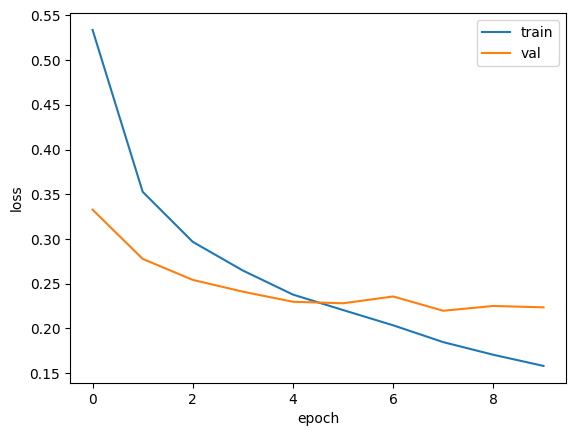

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2198 - accuracy: 0.9205


[0.21983753144741058, 0.9204999804496765]

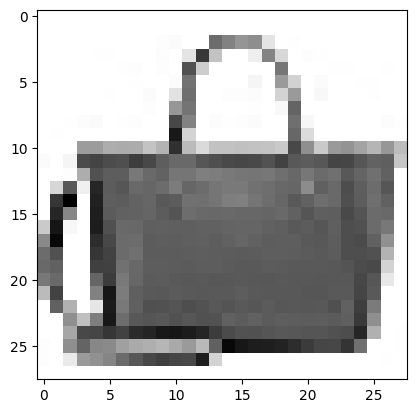

In [31]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [32]:
preds = model.predict(val_scaled[0:1]) # val_scaled[0:1]이 몇 번째 클래스일지 예측, 슬라이싱을 사용하는 이유
print(preds)

1/1 [==============================] - 0s 36ms/step
[[1.0906864e-15 1.0316739e-20 8.7158645e-17 1.1362396e-14 3.6900805e-16
  3.1339209e-14 9.7151401e-15 1.6049347e-12 1.0000000e+00 4.7761551e-13]]


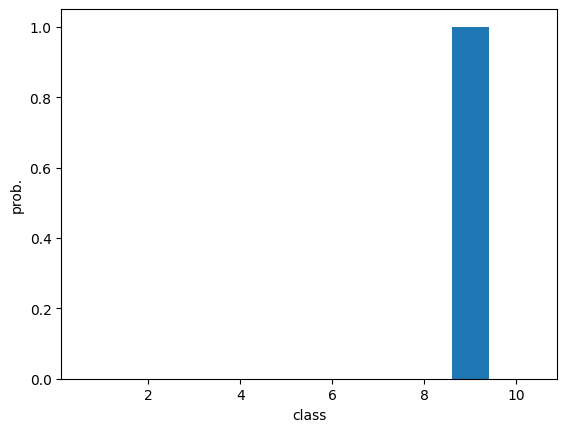

In [33]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [34]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [35]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [36]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [37]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.9128


[0.24157224595546722, 0.9128000140190125]